## Exploration of Trip Starting Times
In this section we analyze the starting times of Chicago taxi trips to find out temporal demand patterns.

We proceed as following:
* Getting an overview of peak demand hours and time zones
* Differentiating between weekday and weekend peak demand times
* Analysis of spatial peak demand hours

_Note: Many visualizations in this notebook are first produced with high dpi and saved as an image and then loaded back to the notebook. This is done to avoid long running times.
Thus the cells containing the logic to produce these plots are commented out. If you want to run these cells:
please make sure that you have enough memory (about 32 GB) and please be patient._

In [2]:
import utils
import seaborn as sns
from matplotlib import pyplot as plt
import aggregation
import eda_starttime

In [3]:
df = utils.read_parquet('Taxi_Trips_cleaned.parquet', utils.get_data_path(), ['Pickup Community Area', 'Dropoff Community Area','Trip Start Month', 'Trip Start Day', 'Trip Start Hour', 'Trip Start Weekday', 'Trip Start Is Weekend'])
geo_df = utils.read_geo_dataset("Boundaries - Community Areas (current).geojson")



In [4]:
df = eda_starttime.add_time_interval(df)

In [4]:
df.head()

,Pickup Community Area,Dropoff Community Area,Trip Start Month,Trip Start Day,Trip Start Hour,Trip Start Weekday,Trip Start Is Weekend,Pickup Time_Interval
0,1.0,1.0,1,1,0,3,0,night
1,8.0,8.0,1,1,0,3,0,night
2,8.0,8.0,1,1,0,3,0,night
3,8.0,6.0,1,1,0,3,0,night
4,22.0,21.0,1,1,0,3,0,night


Total countplot...

<AxesSubplot:xlabel='Trip Start Hour', ylabel='count'>

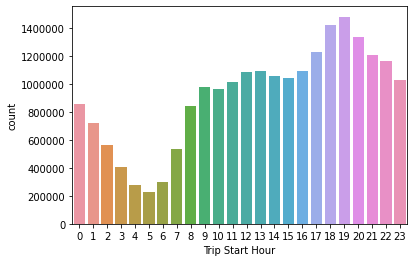

In [5]:
eda_starttime.total_countplot(df)

Weekdays and Weekend countplots...

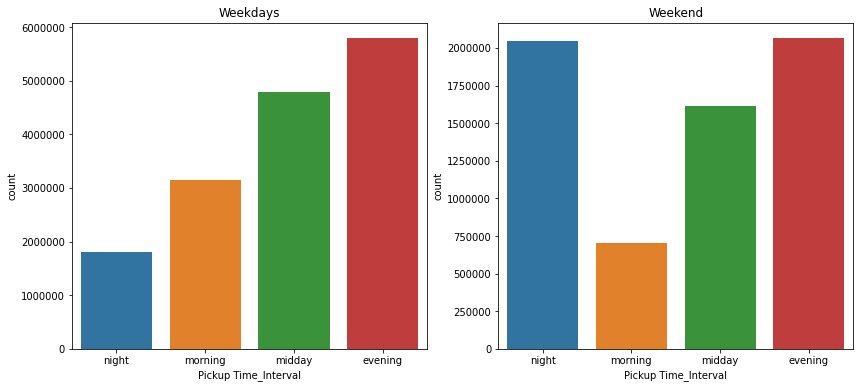

In [6]:
eda_starttime.weekend_weekday_countplot(df, time_interval= True)

In [7]:
df_grp = eda_starttime.area_peak_hours(df)

In [8]:
df_grp

Pickup Community Area    
1.0                    4     4202
                       3     4138
                       9     4061
                       10    3755
                       2     3740
                             ... 
9.0                    11      15
                       17      14
                       9       13
                       12      13
                       18      11
Name: Trip Start Hour, Length: 1836, dtype: int64

In [ ]:
eda_starttime.area_peak_hours_map(df, geo_df)

In [ ]:
eda_starttime.hex_peak_hours_map()

In [ ]:
#Barplot
sns.countplot(data=df, x = 'Trip Start Hour', palette= 'YlOrRd', hue='Trip Start Is Weekend')

In [ ]:
#sns.barplot(data=df, x= 'Trip Start Hour', y= df.value_counts())
#df_jan = df.loc[df['Trip Start Month'] == 1]
#df_jul = df.loc[df['Trip Start Month'] == 7]
df['Trip Start Hour'].value_counts()[:5].plot(kind='barh', color = "Orange")

In [ ]:
# Juli
sns.countplot(data=df.loc[df['Trip Start Month'] == 7], x = 'Trip Start Hour', palette= 'YlOrRd')

In [ ]:
sns.displot(df, x='Trip Start Hour', bins='24')

In [ ]:
# Hours with most trips (total)
frequent_hours = df['Trip Start Hour'].value_counts()[:5]

In [ ]:
frequent_hours

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=1)
axes = sns.countplot(data=df.loc[df['Trip Start Is Weekend'] == 0], x = 'Trip Start Hour', palette= 'YlOrRd')
#axes.hist(df['Trip Start Hour'], bins=24)
#axes.bar(df.index,df['Trip Start Hour'])
print(figure)

In [ ]:
df_agg = aggregation.agg_stats(df['Trip Start Is Weekend'], df['Trip Start Hour'], ['count'])

In [ ]:
#figure, axes = plt.subplots(nrows=1, ncols=2)
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.countplot(data=df.loc[df['Trip Start Is Weekend'] == 0], x = 'Trip Start Hour', palette= 'YlOrRd', ax = axes[0])
sns.countplot(data=df.loc[df['Trip Start Is Weekend'] == 1], x = 'Trip Start Hour', palette= 'YlOrRd', ax = axes[1])
#axes.hist(df['Trip Start Hour'], bins=24)
#axes.bar(df.index,df['Trip Start Hour'])

In [ ]:
sns.countplot(data=df.loc[df['Trip Start Is Weekend'] == 0], x = 'Trip Start Hour', palette= 'YlOrRd')

In [ ]:
sns.countplot(data=df.loc[df['Trip Start Is Weekend'] == 1], x = 'Trip Start Hour', palette= 'YlOrRd')


In [ ]:
df_agg = aggregation.agg_stats(df['Pickup Community Area'], df['Trip Start Hour'], ['mean'])

In [ ]:
df_agg

In [ ]:
df['Pickup Community Area'].nunique()

In [ ]:
df_